# SCRIPT DE EXPLORACIÓN CAJAMAR_WATER_FOOTPRINT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## DESCRIPCIÓN ENUNCIADO COLUMNAS DATASET

*   ID: Identificador del Contador que registra la medida de lectura.
*   SAMPLETIME: Fecha y hora del consumo en formato UTC. Momento en el que se 
produce el mensaje o el contador ha emitido el registro.
*   READINGINTEGER: Medida registrada por el contador en litros. Parte entera.
*   READINGTHOUSANDTH: Medida registrada por el contador en litros. Parte decimal.
*   DELTAINTEGER: Consumo calculado en litros a partir de la medida registrada por el contador. Parte entera.
*   DELTATHOUSANDTH: Consumo calculado en litros a partir de la medida registrada por el contador. Parte decimal.


### CARGAMOS DATOS Y PEQUEÑA VISUALIZACIÓN

In [ ]:
# Carga Fichero
import pandas as pd
path="/content/drive/MyDrive/Cajamar/"
datos = pd.read_csv(path+'Modelar_UH2022.txt',sep='|',parse_dates=['SAMPLETIME'],infer_datetime_format=True) #El enunciado nos indica la columna fecha
print(datos.head(5))
print(datos.describe())
print(datos.dtypes)

   ID          SAMPLETIME  READINGINTEGER  READINGTHOUSANDTH  DELTAINTEGER  \
0   0 2019-06-13 08:34:09          369320                0.0            17   
1   0 2019-06-13 17:34:10          369403                0.0             2   
2   0 2019-06-13 18:34:10          369403                0.0             0   
3   0 2019-06-13 04:34:10          369284                0.0             1   
4   0 2019-06-13 14:34:10          369356                0.0            28   

   DELTATHOUSANDTH  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
                 ID  READINGINTEGER  READINGTHOUSANDTH  DELTAINTEGER  \
count  2.140483e+07    2.140483e+07       2.126477e+07  2.140483e+07   
mean   1.259029e+03    6.052178e+05       3.930737e+00  2.277017e+01   
std    7.334956e+02    2.857464e+06       1.496893e+01  1.516794e+03   
min    0.000000e+00   -6.407800e+04       0.000000e+00 -5.307340e+05   
25%    6.230000e+02    6.368800e+04       0.0

## Detectamos columnas con Nans, las columnas con Nans son las que forman la parte decimal de los datos, su media tiende a 0, la acción elegida es sustituir los Nan por 0.

In [ ]:
print(datos.isnull().any())
print(str(datos['READINGTHOUSANDTH'].isna().sum())+" de "+str(len(datos['READINGTHOUSANDTH'])))
print(str(datos['DELTATHOUSANDTH'].isna().sum())+" de "+str(len(datos['DELTATHOUSANDTH']))) 
datos.fillna(0, inplace=True)
print(datos.isnull().any())

ID                   False
SAMPLETIME           False
READINGINTEGER       False
READINGTHOUSANDTH     True
DELTAINTEGER         False
DELTATHOUSANDTH       True
dtype: bool
140056 de 21404828
140056 de 21404828
ID                   False
SAMPLETIME           False
READINGINTEGER       False
READINGTHOUSANDTH    False
DELTAINTEGER         False
DELTATHOUSANDTH      False
dtype: bool


# COLUMNA ID
## Comprabamos los valores únicos.
### Se puede apreciar que la columna ID es una lista de números de 0 a 2756 con huecos. Se verifican los IDs vacios. 

In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
print(datos["ID"].describe())
print("total únicos: "+str(datos["ID"].nunique()))
print("No coincide con: 2756")
print("#####")
lista=[]
rango=range(2756)
for unique in pd.unique(datos["ID"]):
    lista.append(unique)
for rango in rango:
  if (rango in lista)==False:
    print(rango)
    print(datos[datos["ID"]==rango])     

count   21404828
mean        1259
std          733
min            0
25%          623
50%         1255
75%         1887
max         2756
Name: ID, dtype: float64
total únicos: 2747
No coincide con: 2756
#####
2726
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2738
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2740
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2741
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2750
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2751
Empty DataFrame
Columns: [ID, SAMPLETIME, READINGINTEGER, READINGTHOUSANDTH, DELTAINTEGER, DELTATHOUSANDTH]
Index: []
2752
Empty DataFrame
Columns: [ID, SAMPLETIME, READING

# COLUMNA SAMPLETIME
## El rango maximo y minimo son 2020-01-31 23:59:59 y 2019-02-01 00:00:00, más adelante comprobaremos si todos los IDs cuenta con este rango.

In [ ]:
print(datos.SAMPLETIME.max())
print(datos.SAMPLETIME.min())

2020-01-31 23:59:59
2019-02-01 00:00:00


# COLUMNA READINGINTEGER
## Se elimina el dato negativo

In [ ]:
print(datos['READINGINTEGER'].describe())
datos=datos[datos['READINGINTEGER']>0]
print(datos['READINGINTEGER'].describe())

count   21404828
mean      605218
std      2857464
min       -64078
25%        63688
50%       183157
75%       352050
max     51089763
Name: READINGINTEGER, dtype: float64
count   21345904
mean      606904
std      2861225
min            1
25%        64424
50%       183855
75%       352843
max     51089763
Name: READINGINTEGER, dtype: float64


# COLUMNA READINGTHOUSANDTH
## Datos entre 0 y 100 son aceptados

In [ ]:
print(datos['READINGTHOUSANDTH'].describe())

count   21345904
mean           4
std           15
min            0
25%            0
50%            0
75%            0
max           99
Name: READINGTHOUSANDTH, dtype: float64


# COLUMNA DELTAINTEGER
## Se eliminan datos negativos.

In [ ]:
print(datos['DELTAINTEGER'].describe())
datos=datos[datos['DELTAINTEGER']>0]
print(datos['DELTAINTEGER'].describe())
#datos=datos[datos['DELTAINTEGER']<5000]
print(datos['DELTAINTEGER'].describe())

count   21345904
mean          23
std         1519
min      -530734
25%            0
50%            0
75%            9
max       949981
Name: DELTAINTEGER, dtype: float64
count   10364967
mean          47
std         2171
min            1
25%            4
50%           10
75%           24
max       949981
Name: DELTAINTEGER, dtype: float64
count   10364967
mean          47
std         2171
min            1
25%            4
50%           10
75%           24
max       949981
Name: DELTAINTEGER, dtype: float64


 # COLUMNA DELTATHOUSANDTH
 ## Datos entre 0 y 100 son aceptados

In [ ]:
print(datos['DELTATHOUSANDTH'].describe())

count   10364967
mean           8
std           21
min            0
25%            0
50%            0
75%            0
max           99
Name: DELTATHOUSANDTH, dtype: float64


# CREAMOS CONTADORES POR ID PARA ANALIZAR

### Clases para analizar

In [ ]:
# Librerias
from tqdm import tqdm
from datetime import timedelta
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

class Contador(object):
    def __init__(self, datos_contador, ID):
        self.datos_contador = datos_contador
        self.ID = ID
        self.Preprocesado()       
        self.DiffConsumo = 0
        if not datos_contador.empty:
            # CALCULO LECTURA CONTADOR Y CONSUMO JUNTANDO DECIMALES         
            self.datos_contador = self.datos_contador.set_index('SAMPLETIME')
            self.datos_contador['CONSUMO'] = self.datos_contador['DELTAINTEGER'] + (self.datos_contador['DELTATHOUSANDTH'] / 100)
            self.datos_contador['LECTURA'] = self.datos_contador['READINGINTEGER'] + (self.datos_contador['READINGTHOUSANDTH'] / 100)

            ##NORMALIZACIÓN
            self.datos_contador['CONSUMO_NORMA'] = (self.datos_contador['CONSUMO']-self.datos_contador['CONSUMO'].mean())/self.datos_contador['CONSUMO'].std()

            # CONSUMO POR DIAS            
            self.datos_consumo = pd.DataFrame(self.datos_contador['CONSUMO'].resample(rule='1D', closed='left', label ='left').sum())
            self.datos_consumo['CONSUMO_NORM'] = (self.datos_consumo['CONSUMO'] - self.datos_consumo['CONSUMO'].mean()) / self.datos_consumo['CONSUMO'].std()
            #CÁLCULO DE LA DIFERENCIA DE LECTURAS EN CADA PASO DE TIEMPO PARA OBTENER EL CONSUMO A PARTIR DE LA LECTURA
            self.datos_contador['CONSUMO_CAL'] = self.datos_contador['LECTURA'].diff(1).fillna(0)
            self.__Comprobar_Consumo()
            # COGER SOLO SEMANAS COMPLETAS           
            self.datos_consumo_semanal = pd.DataFrame(self.datos_contador['CONSUMO'].resample(rule='1W', closed='left', label ='left',offset='-36h').sum())            
            # ESTADISTICAS
            self.dias = len(self.datos_consumo.index)
            self.semanas = len(self.datos_consumo_semanal.index)
            self.fecha_inicio_contador= self.datos_consumo.index[0]
            self.fecha_fin_contador= self.datos_consumo.index[-1]    

            #CÁLCULO DE LA DIFERENCIA DE LECTURAS EN CADA PASO DE TIEMPO PARA OBTENER EL CONSUMO A PARTIR DE LA LECTURA
            self.datos_contador['CONSUMO_CAL'] = self.datos_contador['LECTURA'].diff(1).fillna(0)

        else:
            self.datos_consumo = pd.DataFrame()   
    def Preprocesado(self):
        # VALORES ENTEROS INTERPOLAMOS               
        # VALORES DECIMALES SUSTITUIMOS POR CERO
        self.datos_contador['READINGTHOUSANDTH'].fillna(0,inplace=True)
        self.datos_contador['DELTATHOUSANDTH'].fillna(0,inplace=True)       
        # ELIMINAR VALORES NEGATIVOS
        indices = self.datos_contador[self.datos_contador['READINGINTEGER'] < 0].index
        self.datos_contador.drop(indices,inplace=True)
        indices = self.datos_contador[self.datos_contador['DELTAINTEGER'] < 0].index
        self.datos_contador.drop(indices,inplace=True)
        # NORMALIZAR

    def __Comprobar_Consumo(self):
        # COMPRUEBA SI HAY MAS DE 1 LITRO DE DIFERENCIA ENTRE EL CONSUMO EL CALCULO DEL CONSUMO CON LA LECTURA DEL CONTADOR
        # EL VALOR ACUMULADO SE GUARDA EN DiffConsumo
        if not(self.datos_contador['CONSUMO_CAL'].equals(self.datos_contador['CONSUMO'])):
            for index, row in self.datos_contador.iterrows():
                if row['CONSUMO_CAL'] != row['CONSUMO'] and (np.absolute(row['CONSUMO_CAL'] - row['CONSUMO']) > 1):
                    #print(row['CONSUMO_CAL'] - row['CONSUMO'])
                    #print(index,row)
                    self.DiffConsumo += np.absolute(row['CONSUMO_CAL'] - row['CONSUMO'])


class CajaMar_Water(object):
    def __init__(self,Ruta_Datos):
        self.Ruta_Datos = Ruta_Datos
        self.datos = pd.DataFrame()
        self.contadores = []
        self.Cargar_Datos()
    def Cargar_Datos(self):
        print('CARGANDO DATOS.....')
        self.datos = pd.read_csv(self.Ruta_Datos,sep='|',parse_dates=['SAMPLETIME'],infer_datetime_format=True,encoding='utf-8')
        self.datos.sort_values(by=['ID','SAMPLETIME'],inplace=True) 
        # GENERANDO CONTADORES
        print('GENERANDO CONTADORES.....')
        for ID in tqdm(pd.unique(self.datos['ID'])):
            # ALMACENAMOS ID DE CONTADOR Y BORRAMOS LA COLUMNA
            self.contadores.append(Contador(self.datos[self.datos['ID']==ID].drop('ID',axis=1),ID))
        print('PROCESO DE CARGA FINALIZADO')

### Funcion para plotear

In [ ]:
import plotly.graph_objects as go
def plot(df,columna):
  # Create figure
  print(columna.name)
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=list(df.index), y=list(columna)))
  # Set title
  fig.update_layout(title_text=str(columna.name)+"/TIMESTAMP", xaxis_title="TIMESTAMP",yaxis_title=str(columna.name))
  # Add range slider
  fig.update_layout(xaxis=dict(rangeselector=dict( buttons=list([
                  dict(count=6, label="6m", step="month",stepmode="backward"),
                  dict(count=1, label="YTD", step="year", stepmode="todate"),
                  dict(count=1, label="1y", step="year", stepmode="backward"),
                  dict(step="all")])),
          rangeslider=dict(visible=True), type="date"))
  fig.show()


### Creamos clase

In [ ]:
#proyecto=CajaMar_Water(path+'Modelar_UH2022_10_Contadores.txt')
proyecto=CajaMar_Water(path+'Modelar_UH2022.txt')

CARGANDO DATOS.....
GENERANDO CONTADORES.....


100%|██████████| 2747/2747 [20:26<00:00,  2.24it/s]

PROCESO DE CARGA FINALIZADO


# Contadores con fecha maxima menor que 2020-01-31

In [ ]:
contadores_no_ultima_fecha=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if contadores.datos_consumo.index[-1].date()<datos.SAMPLETIME.max().date():
      contadores_no_ultima_fecha.append(contadores.ID)
  else:
    contadores_no_ultima_fecha.append(contadores.ID)


print(str(len(contadores_no_ultima_fecha))+" de "+str(datos["ID"].nunique())+" no llegan a 2020-01-31")

117 de 2675 no llegan a 2020-01-31


In [ ]:
contadores_mas_ultima_fecha=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if contadores.datos_consumo.index[-1].date()>datos.SAMPLETIME.max().date():
      contadores_mas_ultima_fecha.append(contadores.ID)
  else:
    contadores_mas_ultima_fecha.append(contadores.ID)


print(str(len(contadores_mas_ultima_fecha))+" de "+str(datos["ID"].nunique())+" no llegan a 2020-01-31")

2 de 2675 no llegan a 2020-01-31


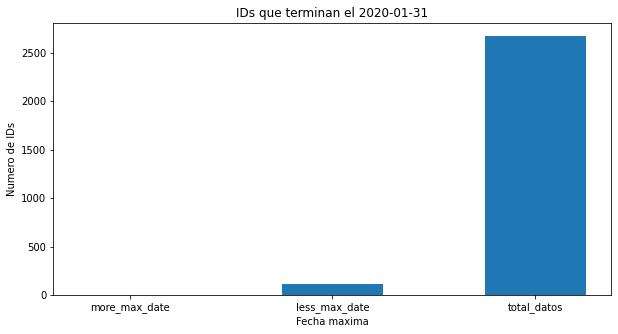

In [ ]:
data_dict = {'more_max_date':len(contadores_mas_ultima_fecha),'less_max_date':len(contadores_no_ultima_fecha), 'total_datos':datos["ID"].nunique()}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values, width = 0.5)
plt.xlabel("Fecha maxima")
plt.ylabel("Numero de IDs")
plt.title("IDs que terminan el 2020-01-31")
plt.show()

# Contadores con fecha minima mayor que 2019-02-01

In [ ]:
contadores_no_primera_fecha=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if contadores.datos_consumo.index[0].date()>datos.SAMPLETIME.min().date():
      contadores_no_primera_fecha.append(contadores.ID)
  else:
    contadores_no_primera_fecha.append(contadores.ID)

print(str(len(contadores_no_primera_fecha))+" de "+str(datos["ID"].nunique())+" no empiezan por 2019-02-01")

500 de 2675 no empiezan por 2019-02-01


In [ ]:
contadores_menos_primera_fecha=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if contadores.datos_consumo.index[0].date()<datos.SAMPLETIME.min().date():
      contadores_menos_primera_fecha.append(contadores.ID)
  else:
    contadores_menos_primera_fecha.append(contadores.ID)

print(str(len(contadores_menos_primera_fecha))+" de "+str(datos["ID"].nunique())+" empiezan antes que el 2019-02-01")

2 de 2675 empiezan antes que el 2019-02-01


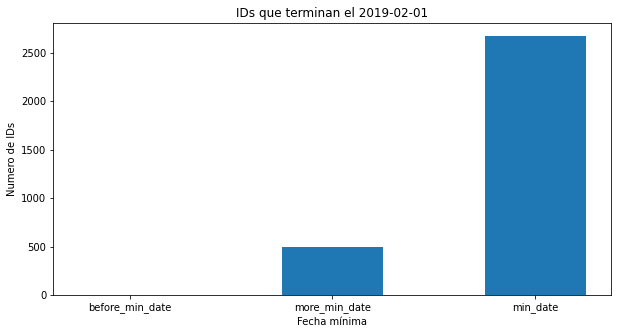

In [ ]:
data_dict = {'before_min_date':len(contadores_menos_primera_fecha),'more_min_date':len(contadores_no_primera_fecha), 'min_date':datos["ID"].nunique()}
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(courses, values,
        width = 0.5)
plt.xlabel("Fecha mínima")
plt.ylabel("Numero de IDs")
plt.title("IDs que terminan el 2019-02-01")
plt.show()

## CONTIENE 365 dias:

In [ ]:
contiene_menos_365=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if len(contadores.datos_consumo)<365:
      contiene_menos_365.append(contadores.ID)
  else:
    contiene_menos_365.append(contadores.ID)

print(str(len(contiene_menos_365))+" de "+str(datos["ID"].nunique())+" tienen menos de 365")

545 de 2675 tienen menos de 365


In [ ]:
contiene_mas_365=[]
for contadores in proyecto.contadores:
  if not contadores.datos_consumo.empty:
    if len(contadores.datos_consumo)>365:
      contiene_mas_365.append(contadores.ID)
  else:
    contiene_mas_365.append(contadores.ID)

print(str(len(contiene_mas_365))+" de "+str(datos["ID"].nunique())+" tienen mas de 365")

2 de 2675 tienen mas de 365


### Contadores con una diferencia de 100000 entre el sumatorio CONSUMO Y LECTURA

In [ ]:
contadores_error=[]
print("Los contadores con ID cuenta con una diferencia de 100000: ")
for contadores in proyecto.contadores:
  if(contadores.DiffConsumo>100000):
    contadores_error.append(contadores.ID)
    #print(contadores.ID)

print(contadores_error)
print(len(contadores_error))

Los contadores con ID cuenta con una diferencia de 100000: 
[33, 57, 111, 231, 493, 635, 658, 666, 1036, 1247, 1280, 1338, 1758, 1933, 2029, 2063, 2185, 2417, 2434, 2452, 2459, 2460, 2462, 2464, 2466, 2467, 2471, 2473, 2477, 2479, 2481, 2483, 2487, 2488, 2489, 2490, 2492, 2494, 2502, 2505, 2507, 2512, 2522, 2523, 2524, 2536, 2538, 2550, 2569, 2582, 2632]
51


##########################################################################################

## OBSERVAMOS CONSUMO CONTADOR 5
### El contador no llega a la fecha final 2020-01-31

In [ ]:
Contador = 5 #@param {type:"integer"}
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["CONSUMO"])

CONSUMO


## OBSERVAMOS LECTURA CONTADOR 5
### La lectura suma el consumo y muestra el total


---



In [ ]:
Contador =  5#@param {type:"integer"}
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador['LECTURA'])

LECTURA


## OBSERVAMOS CONSUMO CONTADOR 2735
### Se puede apreciar que solo tenemos datos un solo dia

In [ ]:
Contador = 2735 #@param {type:"integer"}
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["CONSUMO"])

CONSUMO


## OBSERVAMOS LECTURA CONTADOR 2561
### Periodos muy grande con 0 consumo


In [ ]:
Contador = 2561 #@param {type:"integer"}
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["CONSUMO"])

CONSUMO


## OBSERVAMOS LECTURA CONTADOR 167
### Comportamiento extraño a mitad año

In [ ]:
Contador = 167 #@param {type:"integer"}
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["CONSUMO"])

CONSUMO


## OBSERVAMOS LECTURA CONTADOR 2521
### Siempre 0

In [ ]:
Contador = 2521 #@param {type:"integer"}
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["CONSUMO"])

CONSUMO


In [ ]:
Contador = 2521 #@param {type:"integer"}
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["LECTURA"])

LECTURA


# Contadores con outliers
## Se puede observar un salto de 1.5M en la lectura del contador 111

In [ ]:
Contador =  635#@param {type:"integer"}
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["CONSUMO"])
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["LECTURA"])

CONSUMO


LECTURA


## La lectura es constante en el contador 2464 en cambio su consumo no lo refleja

In [ ]:
Contador = 2464 #@param {type:"integer"}
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["CONSUMO"])
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["LECTURA"])

CONSUMO


LECTURA


## En el contador 2466 contamos con una anomalia en el consumo, que en la lectura no se vee reflejado

In [ ]:
Contador =  812#@param {type:"integer"}
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["CONSUMO"])
plot(proyecto.contadores[Contador].datos_contador,proyecto.contadores[Contador].datos_contador["LECTURA"])

CONSUMO


LECTURA


In [ ]:
print(proyecto.contadores_outliers)

AttributeError: ignored